In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# csv files for auctions from 2018

data1 = pd.read_csv('dolls/dolls_1.csv')
data2 = pd.read_csv('dolls/dolls_2.csv')

data_2018 = pd.concat([data1, data2])
data_2018.head()

,lotInner 2,lotInner 4,lotInner href,lotImage src,lotData,lotData 2,lotData 3,lotData 4
0,701,Multi-Faced Doll By Cark Bergner.,http://auctions.morphyauctions.com/Multi_Faced...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 5,Min Bid: $300.00,Final Price: $450.00,Estimate: $600 - $900
1,702,"""Belton-Type"" Child Doll.",http://auctions.morphyauctions.com/_Belton_Typ...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 6,Min Bid: $250.00,Final Price: $448.00,Estimate: $500 - $800
2,703,French Fashion Doll with Unusual Body.,http://auctions.morphyauctions.com/French_Fash...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 11,"Min Bid: $1,000.00","Final Price: $2,280.00","Estimate: $2,000 - $3,000"
3,704,Lot Of 2: Bisque Shoulder Head French Fashion ...,http://auctions.morphyauctions.com/Lot_Of_2__B...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 4,Min Bid: $500.00,Final Price: $768.00,"Estimate: $1,000 - $1,400"
4,705,1890's French Bisque Head Walking Doll.,http://auctions.morphyauctions.com/1890_s_Fren...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 2,Min Bid: $900.00,"Final Price: $1,664.00","Estimate: $1,800 - $2,500"


In [5]:
data_2018.drop(['lotInner 2','lotInner href', 'lotImage src', 'lotData','lotData 2', 'lotData 4'],axis=1, inplace=True)
data_2018.columns

Index(['lotInner 4', 'lotData 3'], dtype='object')

In [6]:
# Lets split numeric features to eliminate text and keep numeric data

new = data_2018['lotData 3'].str.split(' ', expand=True)[2] # this will lead to the sold price
data_2018['Final_price'] = new

data_2018.head()

,lotInner 4,lotData 3,Final_price
0,Multi-Faced Doll By Cark Bergner.,Final Price: $450.00,$450.00
1,"""Belton-Type"" Child Doll.",Final Price: $448.00,$448.00
2,French Fashion Doll with Unusual Body.,"Final Price: $2,280.00","$2,280.00"
3,Lot Of 2: Bisque Shoulder Head French Fashion ...,Final Price: $768.00,$768.00
4,1890's French Bisque Head Walking Doll.,"Final Price: $1,664.00","$1,664.00"


In [7]:
# Lets eliminate dollar signs from price features.

data_2018.Final_price = data_2018.Final_price.str.replace('$', '')

data_2018.head()

,lotInner 4,lotData 3,Final_price
0,Multi-Faced Doll By Cark Bergner.,Final Price: $450.00,450.00
1,"""Belton-Type"" Child Doll.",Final Price: $448.00,448.00
2,French Fashion Doll with Unusual Body.,"Final Price: $2,280.00","2,280.00"
3,Lot Of 2: Bisque Shoulder Head French Fashion ...,Final Price: $768.00,768.00
4,1890's French Bisque Head Walking Doll.,"Final Price: $1,664.00","1,664.00"


In [8]:
# Eliminating ',' from numeric data

data_2018.Final_price = data_2018.Final_price.str.replace(',', '')

data_2018.head()

,lotInner 4,lotData 3,Final_price
0,Multi-Faced Doll By Cark Bergner.,Final Price: $450.00,450.00
1,"""Belton-Type"" Child Doll.",Final Price: $448.00,448.00
2,French Fashion Doll with Unusual Body.,"Final Price: $2,280.00",2280.00
3,Lot Of 2: Bisque Shoulder Head French Fashion ...,Final Price: $768.00,768.00
4,1890's French Bisque Head Walking Doll.,"Final Price: $1,664.00",1664.00


In [15]:
data_2018.to_csv('data_2018.csv', index=False)

In [19]:
data_2018_reload = pd.read_csv('data_2018.csv', encoding="latin-1")

In [20]:
data_2018_reload.Final_price = pd.to_numeric(data_2018_reload.Final_price, downcast='float')

In [21]:
data_2018_reload.Final_price.sum()

458375.25

In [22]:
# csv files for auctions from 2017

data3 = pd.read_csv('dolls/dolls_3.csv')
data4 = pd.read_csv('dolls/dolls_4.csv')
data5 = pd.read_csv('dolls/dolls_5.csv')

data_2017 = pd.concat([data3, data4, data5])
data_2017.head()

,lotInner 2,lotInner 4,lotInner href,lotImage src,lotData,lotData 2,lotData 3,lotData 4
0,1,Lot of 4: German Open Mouth Dolls.,http://auctions.morphyauctions.com/Lot_of_4__G...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 12,Min Bid: $75.00,Final Price: $390.00,Estimate: $300 - $500
1,2,Assorted Doll Heads & Parts.,http://auctions.morphyauctions.com/Assorted_Do...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 23,Min Bid: $75.00,Final Price: $806.00,Estimate: $350 - $500
2,3,"Kestner ""XI"" Pouty Child.",http://auctions.morphyauctions.com/Kestner__XI...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 16,Min Bid: $250.00,"Final Price: $1,500.00","Estimate: $1,000 - $1,500"
3,4,Simon & Halbig 939 Character Child.,http://auctions.morphyauctions.com/Simon___Hal...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 20,Min Bid: $150.00,Final Price: $889.00,Estimate: $600 - $800
4,5,Jumeau E 9 J Child Bebe.,http://auctions.morphyauctions.com/Jumeau_E_9_...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 25,Min Bid: $500.00,"Final Price: $3,175.00","Estimate: $2,000 - $3,000"


In [23]:
data_2017.drop(['lotInner 2','lotInner href', 'lotImage src', 'lotData','lotData 2', 'lotData 4'],axis=1, inplace=True)
data_2017.columns

Index(['lotInner 4', 'lotData 3'], dtype='object')

In [24]:
new = data_2017['lotData 3'].str.split(' ', expand=True)[2] # this will lead to the sold price
data_2017['Final_price'] = new

data_2017.head()

,lotInner 4,lotData 3,Final_price
0,Lot of 4: German Open Mouth Dolls.,Final Price: $390.00,$390.00
1,Assorted Doll Heads & Parts.,Final Price: $806.00,$806.00
2,"Kestner ""XI"" Pouty Child.","Final Price: $1,500.00","$1,500.00"
3,Simon & Halbig 939 Character Child.,Final Price: $889.00,$889.00
4,Jumeau E 9 J Child Bebe.,"Final Price: $3,175.00","$3,175.00"


In [25]:
# Lets eliminate dollar signs from price features.

data_2017.Final_price = data_2017.Final_price.str.replace('$', '')

data_2017.head()

,lotInner 4,lotData 3,Final_price
0,Lot of 4: German Open Mouth Dolls.,Final Price: $390.00,390.00
1,Assorted Doll Heads & Parts.,Final Price: $806.00,806.00
2,"Kestner ""XI"" Pouty Child.","Final Price: $1,500.00","1,500.00"
3,Simon & Halbig 939 Character Child.,Final Price: $889.00,889.00
4,Jumeau E 9 J Child Bebe.,"Final Price: $3,175.00","3,175.00"


In [26]:
# Eliminating ',' from numeric data

data_2017.Final_price = data_2017.Final_price.str.replace(',', '')

data_2017.head()

,lotInner 4,lotData 3,Final_price
0,Lot of 4: German Open Mouth Dolls.,Final Price: $390.00,390.00
1,Assorted Doll Heads & Parts.,Final Price: $806.00,806.00
2,"Kestner ""XI"" Pouty Child.","Final Price: $1,500.00",1500.00
3,Simon & Halbig 939 Character Child.,Final Price: $889.00,889.00
4,Jumeau E 9 J Child Bebe.,"Final Price: $3,175.00",3175.00


In [27]:
data_2017.Final_price = pd.to_numeric(data_2017.Final_price, downcast='float')

In [28]:
data_2017.Final_price.sum()

150334.75

In [29]:
# csv files for auctions from 2016

data6 = pd.read_csv('dolls/dolls_6.csv')
data7 = pd.read_csv('dolls/dolls_7.csv')
data8 = pd.read_csv('dolls/dolls_8.csv')
data9 = pd.read_csv('dolls/dolls_9.csv')
data10 = pd.read_csv('dolls/dolls_10.csv')
data11 = pd.read_csv('dolls/dolls_11.csv')
data12 = pd.read_csv('dolls/dolls_12.csv')
data13 = pd.read_csv('dolls/dolls_13.csv')

data_2016 = pd.concat([data6,data7,data8,data9,data10,data11,data12,data13], sort=False)
data_2016.head()

,lotInner 2,lotInner 4,lotInner href,lotImage src,lotData,lotData 2,lotData 3,lotData 4
0,841,German Tin & Cast Iron Sewing Machine Still Bank.,http://auctions.morphyauctions.com/German_Tin_...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 5,Min Bid: $50.00,Final Price: $156.25,Estimate: $200 - $300
1,1143A,Japanese Tin Litho Friction Circus Jeep.,http://auctions.morphyauctions.com/Japanese_Ti...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 7,Min Bid: $50.00,Final Price: $210.00,Estimate: $200 - $400
2,1484,Lot Of 2: Small Bisque Head Dolls In Wicker Ba...,http://auctions.morphyauctions.com/Lot_Of_2__S...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 5,Min Bid: $150.00,Final Price: $780.00,Estimate: $600 - $900
3,1485,Beautiful Jumeau Bébé In Trunk With Extra Clot...,http://auctions.morphyauctions.com/Beautiful_J...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 18,Min Bid: $900.00,"Final Price: $3,900.00","Estimate: $3,500 - $5,500"
4,1486,Pair Of All Original Sister Fashion Dolls.,http://auctions.morphyauctions.com/Pair_Of_All...,https://auctions.morphyauctions.com/ItemImages...,# Bids: 20,"Min Bid: $2,250.00","Final Price: $17,220.00","Estimate: $8,500 - $12,500"


In [30]:
data_2016.drop(['lotInner 2','lotInner href', 'lotImage src', 'lotData','lotData 2', 'lotData 4'],axis=1, inplace=True)
data_2016.columns

Index(['lotInner 4', 'lotData 3'], dtype='object')

In [31]:
new = data_2016['lotData 3'].str.split(' ', expand=True)[2] # this will lead to the sold price
data_2016['Final_price'] = new

data_2016.head()

,lotInner 4,lotData 3,Final_price
0,German Tin & Cast Iron Sewing Machine Still Bank.,Final Price: $156.25,$156.25
1,Japanese Tin Litho Friction Circus Jeep.,Final Price: $210.00,$210.00
2,Lot Of 2: Small Bisque Head Dolls In Wicker Ba...,Final Price: $780.00,$780.00
3,Beautiful Jumeau Bébé In Trunk With Extra Clot...,"Final Price: $3,900.00","$3,900.00"
4,Pair Of All Original Sister Fashion Dolls.,"Final Price: $17,220.00","$17,220.00"


In [32]:
# Lets eliminate dollar signs from price features.

data_2016.Final_price = data_2016.Final_price.str.replace('$', '')

data_2016.head()

,lotInner 4,lotData 3,Final_price
0,German Tin & Cast Iron Sewing Machine Still Bank.,Final Price: $156.25,156.25
1,Japanese Tin Litho Friction Circus Jeep.,Final Price: $210.00,210.00
2,Lot Of 2: Small Bisque Head Dolls In Wicker Ba...,Final Price: $780.00,780.00
3,Beautiful Jumeau Bébé In Trunk With Extra Clot...,"Final Price: $3,900.00","3,900.00"
4,Pair Of All Original Sister Fashion Dolls.,"Final Price: $17,220.00","17,220.00"


In [33]:
# Eliminating ',' from numeric data

data_2016.Final_price = data_2016.Final_price.str.replace(',', '')

data_2016.head(20)

,lotInner 4,lotData 3,Final_price
0,German Tin & Cast Iron Sewing Machine Still Bank.,Final Price: $156.25,156.25
1,Japanese Tin Litho Friction Circus Jeep.,Final Price: $210.00,210.00
2,Lot Of 2: Small Bisque Head Dolls In Wicker Ba...,Final Price: $780.00,780.00
3,Beautiful Jumeau Bébé In Trunk With Extra Clot...,"Final Price: $3,900.00",3900.00
4,Pair Of All Original Sister Fashion Dolls.,"Final Price: $17,220.00",17220.00
5,Lovely French Fashion Doll.,"Final Price: $1,464.00",1464.00
6,"11"" Tete Jumeau #2 Bebe.","Final Price: $4,305.00",4305.00
7,"11"" Tete Jumeau #2 Bebe.","Final Price: $2,280.00",2280.00
8,Lot Of 3: Bisque Head Dolls.,Final Price: $799.50,799.50
9,Lot Of 2: Bisque Head Boy Dolls.,"Final Price: $1,476.00",1476.00


In [34]:
data_2016.Final_price = pd.to_numeric(data_2016.Final_price, downcast='float', errors='coerce')

In [35]:
data_2016.Final_price.sum()

943445.5

In [36]:
all_data = pd.read_csv('dolls/all_dolls_data.csv')
all_data.Link.iloc[1706]

'http://auctions.morphyauctions.com/Stunning_A__Marque_French_Doll____________________-LOT182701.aspx'

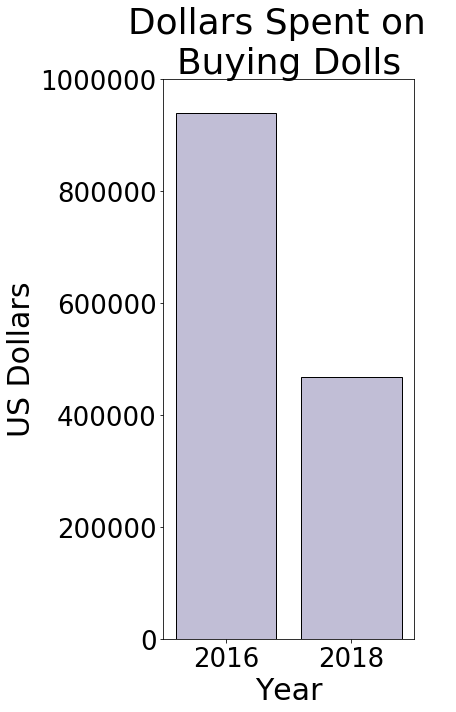

In [43]:
plt.figure(figsize=(6,10))
sns.barplot(x=[2016,2018], y=[(938905.5),(467375.25)], color='#bebada', edgecolor='k')

plt.title('Dollars Spent on  \nBuying Dolls', fontsize=36)

plt.xlabel('Year', fontsize=30)
plt.ylabel('US Dollars', fontsize=30)

plt.yticks(fontsize=26)
plt.xticks(fontsize=26)

plt.ylim(0,1000000)
plt.tight_layout()

plt.savefig('Market_size', facecolor=None)